In [ ]:
# Final Assignment: compare patient data from two different hospitals to determine which one may be doing better in terms of readmission rates and patient satisfaction. 

In [132]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [141]:
# Reads in txt files for both hospitals
Patient_data_H1 = np.loadtxt(r"C:\Users\isaia\OneDrive\Desktop\Academic work\2024\2024 Fall\HSC 4933_Python for health analytics\assignments\Week 15 Final assignment\Hospital1.txt", dtype='str', delimiter=',')
Patient_data_H2 = np.loadtxt(r"C:\Users\isaia\OneDrive\Desktop\Academic work\2024\2024 Fall\HSC 4933_Python for health analytics\assignments\Week 15 Final assignment\Hospital2.txt", dtype='str', delimiter=',')

# sets column names
columns = ['PatientID', 'Readmission', 'Staff_Satisfaction', 'Cleanliness_Satisfaction',
            'Food_Satisfaction', 'Comfort_Satisfaction', 'Communication_Satisfaction']


Patient_data_DF_H1 = pd.DataFrame(Patient_data_H1[1:], columns=columns)
Patient_data_DF_H2 = pd.DataFrame(Patient_data_H2[1:], columns=columns)

# Convert columns to appropriate data types for analysis later in code
Patient_data_DF_H1 = Patient_data_DF_H1.astype({
    'PatientID': int,
    'Readmission': int,
    'Staff_Satisfaction': float,
    'Cleanliness_Satisfaction': float,
    'Food_Satisfaction': float,
    'Comfort_Satisfaction': float,
    'Communication_Satisfaction': float
})

Patient_data_DF_H2 = Patient_data_DF_H2.astype({
    'PatientID': int,
    'Readmission': int,
    'Staff_Satisfaction': float,
    'Cleanliness_Satisfaction': float,
    'Food_Satisfaction': float,
    'Comfort_Satisfaction': float,
    'Communication_Satisfaction': float
})


In [ ]:

# Calculate and display the following statistics:
# The number of patients who were readmitted.
print("Hospital one:")
Patient_Readmission_count_H1 = Patient_data_DF_H1['Readmission'].value_counts().get(1, 0)
print("Number of patients readmitted:", Patient_Readmission_count_H1)

# The average satisfaction score for each category (staff, cleanliness, food, comfort, and communication).
Staff_Satisfaction_mean = Patient_data_DF_H1['Staff_Satisfaction'].mean()
print("Average staff satisfaction:", round(Staff_Satisfaction_mean, 2))
Cleanliness_Satisfaction_mean = Patient_data_DF_H1['Cleanliness_Satisfaction'].mean()
print("Average cleanliness satisfaction:", round(Cleanliness_Satisfaction_mean, 2))
Food_Satisfaction_mean = Patient_data_DF_H1['Food_Satisfaction'].mean()
print("Average food satisfaction:", round(Food_Satisfaction_mean, 2))
Comfort_Satisfaction_mean = Patient_data_DF_H1['Comfort_Satisfaction'].mean()
print("Average comfort satisfaction:", round(Comfort_Satisfaction_mean, 2))
Communication_Satisfaction_mean = Patient_data_DF_H1['Communication_Satisfaction'].mean()
print("Average communication satisfaction:", round(Communication_Satisfaction_mean, 2))

###########################################################################################
print()
print("Hospital two:")

Patient_Readmission_count_H2 = Patient_data_DF_H2['Readmission'].value_counts().get(1, 0)
print("Number of patients readmitted:", Patient_Readmission_count_H2)

# The average satisfaction score for each category (staff, cleanliness, food, comfort, and communication).
Staff_Satisfaction_mean_H2 = Patient_data_DF_H2['Staff_Satisfaction'].mean()
print("Average staff satisfaction:", round(Staff_Satisfaction_mean_H2, 2))
Cleanliness_Satisfaction_mean_H2 = Patient_data_DF_H2['Cleanliness_Satisfaction'].mean()
print("Average cleanliness satisfaction:", round(Cleanliness_Satisfaction_mean_H2, 2))
Food_Satisfaction_mean_H2 = Patient_data_DF_H2['Food_Satisfaction'].mean()
print("Average food satisfaction:", round(Food_Satisfaction_mean_H2, 2))
Comfort_Satisfaction_mean_H2 = Patient_data_DF_H2['Comfort_Satisfaction'].mean()
print("Average comfort satisfaction:", round(Comfort_Satisfaction_mean_H2, 2))
Communication_Satisfaction_mean_H2 = Patient_data_DF_H2['Communication_Satisfaction'].mean()
print("Average communication satisfaction:", round(Communication_Satisfaction_mean_H2, 2))





Hospital one:
Number of patients readmitted: 38
Average staff satisfaction: 3.51
Average cleanliness satisfaction: 3.61
Average food satisfaction: 3.51
Average comfort satisfaction: 3.72
Average communication satisfaction: 3.7

Hospital two:
Number of patients readmitted: 29
Average staff satisfaction: 3.53
Average cleanliness satisfaction: 3.63
Average food satisfaction: 3.56
Average comfort satisfaction: 3.75
Average communication satisfaction: 3.72


In [149]:
# Logistic regression to determine if there is any possible correlation between overall satisfaction scores and readmission rates for both hositpals 

# Defining Predictor variables (X) and Response variable (Y)
XH1 = Patient_data_DF_H1[['Staff_Satisfaction', 'Cleanliness_Satisfaction', 'Food_Satisfaction', 'Comfort_Satisfaction', 'Communication_Satisfaction']]
YH1 = Patient_data_DF_H1[['Readmission']].values.ravel()

# Normalizing the data to fit into logistic model and stay between 0 & 1
scalerH1 = StandardScaler()
X_scaledH1 = scalerH1.fit_transform(XH1)

# Assigning Training and test samples 
X_trainH1, X_testH1, Y_trainH1, Y_testH1 = train_test_split(X_scaledH1, YH1, test_size=0.3, random_state=42)

# Creating LR Model
log_regressionH1 = LogisticRegression()

# Training the LR model using training data
log_regressionH1.fit(X_trainH1, Y_trainH1)

# Predicting the target variable on test data
Y_predH1 = log_regressionH1.predict(X_testH1)

# Correlation between Overall satisfaction scores and Readmission 
Patient_data_DF_H1['Staff_Satisfaction'] = pd.to_numeric(Patient_data_DF_H1['Staff_Satisfaction'])
Patient_data_DF_H1['Cleanliness_Satisfaction'] = pd.to_numeric(Patient_data_DF_H1['Cleanliness_Satisfaction'])
Patient_data_DF_H1['Food_Satisfaction'] = pd.to_numeric(Patient_data_DF_H1['Food_Satisfaction'])
Patient_data_DF_H1['Comfort_Satisfaction'] = pd.to_numeric(Patient_data_DF_H1['Comfort_Satisfaction'])
Patient_data_DF_H1['Communication_Satisfaction'] = pd.to_numeric(Patient_data_DF_H1['Communication_Satisfaction'])

# sums the following 
Patient_data_DF_H1['Overall_Satisfaction'] = (
    Patient_data_DF_H1['Staff_Satisfaction'] +
    Patient_data_DF_H1['Cleanliness_Satisfaction'] +
    Patient_data_DF_H1['Food_Satisfaction'] +
    Patient_data_DF_H1['Comfort_Satisfaction'] +
    Patient_data_DF_H1['Communication_Satisfaction']
)

# Converting columns to numeric 
Patient_data_DF_H1['Readmission'] = pd.to_numeric(Patient_data_DF_H1['Readmission'])
Patient_data_DF_H1['Overall_Satisfaction'] = pd.to_numeric(Patient_data_DF_H1['Overall_Satisfaction'])

Readmission_H1 = Patient_data_DF_H1['Readmission']
Overall_Satisfaction_H1 = Patient_data_DF_H1["Overall_Satisfaction"]


# For H2 #################
XH2 = Patient_data_DF_H2[['Staff_Satisfaction', 'Cleanliness_Satisfaction', 'Food_Satisfaction', 'Comfort_Satisfaction', 'Communication_Satisfaction']]
YH2 = Patient_data_DF_H2[['Readmission']].values.ravel()

scalerH2 = StandardScaler()
X_scaledH2 = scalerH2.fit_transform(XH2)

X_trainH2, X_testH2, Y_trainH2, Y_testH2 = train_test_split(X_scaledH2, Y, test_size=0.3, random_state=42)
log_regressionH2 = LogisticRegression()
log_regressionH2.fit(X_trainH2, Y_trainH2)
Y_predH2 = log_regressionH2.predict(X_testH2)



Patient_data_DF_H2['Staff_Satisfaction'] = pd.to_numeric(Patient_data_DF_H2['Staff_Satisfaction'])
Patient_data_DF_H2['Cleanliness_Satisfaction'] = pd.to_numeric(Patient_data_DF_H2['Cleanliness_Satisfaction'])
Patient_data_DF_H2['Food_Satisfaction'] = pd.to_numeric(Patient_data_DF_H2['Food_Satisfaction'])
Patient_data_DF_H2['Comfort_Satisfaction'] = pd.to_numeric(Patient_data_DF_H2['Comfort_Satisfaction'])
Patient_data_DF_H2['Communication_Satisfaction'] = pd.to_numeric(Patient_data_DF_H2['Communication_Satisfaction'])

Patient_data_DF_H2['Overall_Satisfaction'] = (
    Patient_data_DF_H2['Staff_Satisfaction'] +
    Patient_data_DF_H2['Cleanliness_Satisfaction'] +
    Patient_data_DF_H2['Food_Satisfaction'] +
    Patient_data_DF_H2['Comfort_Satisfaction'] +
    Patient_data_DF_H2['Communication_Satisfaction']
) 

Patient_data_DF_H2['Readmission'] = pd.to_numeric(Patient_data_DF_H2['Readmission'])
Patient_data_DF_H2['Overall_Satisfaction'] = pd.to_numeric(Patient_data_DF_H2['Overall_Satisfaction'])

Readmission_H2 = Patient_data_DF_H2['Readmission']
Overall_Satisfaction_H2 = Patient_data_DF_H2["Overall_Satisfaction"]

############################################
# LR Model accuracy evaluation
print('Logistic Regression Output for hospital 1')
accuracyH1 = accuracy_score(Y_testH1, Y_predH1)
print(f"Accuracy of model: {accuracyH1:.2f}")

# LR coefficients
print('Intercept:', log_regressionH1.intercept_)
print('Coefficients:', log_regressionH1.coef_)


print()
print("Hospital 2")
print('Logistic Regression Output for hospital 2')
accuracyH2 = accuracy_score(Y_testH2, Y_predH2)
print(f"Accuracy of model: {accuracyH2:.2f}")

print('Intercept:', log_regressionH2.intercept_)
print('Coefficients:', log_regressionH2.coef_)



Logistic Regression Output for hospital 1
Accuracy of model: 0.78
Intercept: [-0.21330544]
Coefficients: [[-0.21438075  1.83224563  0.74722495 -0.51270421 -1.00244397]]

Hospital 2
Logistic Regression Output for hospital 2
Accuracy of model: 0.72
Intercept: [-0.15298158]
Coefficients: [[-0.17192892  1.73754995  0.63218027 -0.50070145 -0.80553489]]


Pearson correlation between Overall Satisfaction Scores & Readmission for hosptial 1: 0.162

Pearson correlation between Overall Satisfaction Scores & Readmission for hospital 2: 0.141


Text(0, 0.5, 'Readmission')

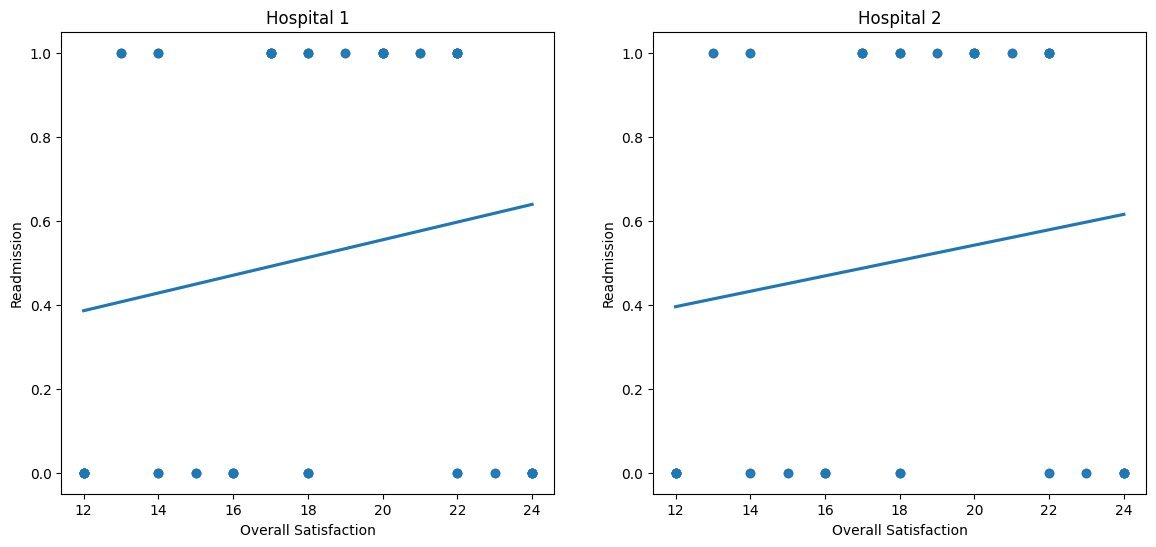

In [153]:
# Correlation between Overall satisfaction scores and Readmission 
corr,_ = pearsonr(Readmission_H1, Overall_Satisfaction_H1)  
print('Pearson correlation between Overall Satisfaction Scores & Readmission for hosptial 1: %.3f' % corr) 

print()
corr,_ = pearsonr(Readmission_H2, Overall_Satisfaction_H2)  
print('Pearson correlation between Overall Satisfaction Scores & Readmission for hospital 2: %.3f' % corr) 

# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first regression plot on the first subplot
sns.regplot(x=Patient_data_DF_H1['Overall_Satisfaction'], y=Patient_data_DF_H1['Readmission'], ci=False, ax=axes[0])
axes[0].set_title('Hospital 1')
axes[0].set_xlabel('Overall Satisfaction')
axes[0].set_ylabel('Readmission')

# Plot the second regression plot on the second subplot
sns.regplot(x=Patient_data_DF_H2['Overall_Satisfaction'], y=Patient_data_DF_H2['Readmission'], ci=False, ax=axes[1])
axes[1].set_title('Hospital 2')
axes[1].set_xlabel('Overall Satisfaction')
axes[1].set_ylabel('Readmission')
